# Analysis of Wins-Draws-Losses of the Premier League
## Using BeautifulSoup (PS:Regular Expressions was also a great help :))

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from bs4 import BeautifulSoup 
import re

In [3]:
import urllib.request, urllib.parse, urllib.error

## For Certification Errors

In [4]:
import ssl

In [5]:
ctx=ssl.create_default_context()
ctx.check_hostname=False
ctx.verify_mode=ssl.CERT_NONE

In [6]:
records=dict()

## Iterating Between URl's from year 1992- 2019
### PS: Faced some issues as after 2013 FA_Premiere_League changed to Premier_League

In [7]:
surl1='https://en.wikipedia.org/wiki/'
surl2='%E2%80%93'
surl3='_FA_Premier_League'

## Scraping data using Beautiful Soup and Regular Expressions

In [8]:
for i in range(1992, 2019):
    if i<=2008 and i>=1999:
        url=surl1+str(i)+surl2+'0'+str((i%100+1)%100)+surl3
    elif (i<1999 or i>2008) and i<2013:
        url=surl1+str(i)+surl2+str((i%100+1)%100)+surl3
    elif i>=2013:
        url=surl1+str(i)+surl2+str((i%100+1)%100)+ '_Premier_League'
    print('url:', url)
    h=urllib.request.urlopen(url, context=ctx)
    file=h.read()
    soup=BeautifulSoup(file,'html.parser')
    tags=soup.find('table', attrs={'class':"wikitable", 'style':"text-align:center;"})
    tags=str(tags)
    lst=re.findall('<th scope="row" style="text-align: left; white-space:nowrap;font-weight: normal.+<a.+>(.+)</a>', tags)
    for ele in lst:
        if ele not in records:
            records[ele]=dict()
    lst1=re.findall('<td style="font-weight: normal;background-color:.+;">(.+)', tags)
    count=0
    for j in range(1, len(lst1), 7):
        records[lst[count]]['Win']=records[lst[count]].get('Win', 0)+int(lst1[j])
        records[lst[count]]['Draw']=records[lst[count]].get('Draw', 0)+int(lst1[j+1])
        records[lst[count]]['Loss']=records[lst[count]].get('Loss', 0)+int(lst1[j+2])
        count = count + 1
    lst=None
    lst1=None
print(records)

url: https://en.wikipedia.org/wiki/1992%E2%80%9393_FA_Premier_League
url: https://en.wikipedia.org/wiki/1993%E2%80%9394_FA_Premier_League
url: https://en.wikipedia.org/wiki/1994%E2%80%9395_FA_Premier_League
url: https://en.wikipedia.org/wiki/1995%E2%80%9396_FA_Premier_League
url: https://en.wikipedia.org/wiki/1996%E2%80%9397_FA_Premier_League
url: https://en.wikipedia.org/wiki/1997%E2%80%9398_FA_Premier_League
url: https://en.wikipedia.org/wiki/1998%E2%80%9399_FA_Premier_League
url: https://en.wikipedia.org/wiki/1999%E2%80%9300_FA_Premier_League
url: https://en.wikipedia.org/wiki/2000%E2%80%9301_FA_Premier_League
url: https://en.wikipedia.org/wiki/2001%E2%80%9302_FA_Premier_League
url: https://en.wikipedia.org/wiki/2002%E2%80%9303_FA_Premier_League
url: https://en.wikipedia.org/wiki/2003%E2%80%9304_FA_Premier_League
url: https://en.wikipedia.org/wiki/2004%E2%80%9305_FA_Premier_League
url: https://en.wikipedia.org/wiki/2005%E2%80%9306_FA_Premier_League
url: https://en.wikipedia.org/wiki

## Data Table

In [9]:
df = pd.DataFrame([(k, v['Win'], v['Loss'], v['Draw']) for (k,v) in records.items()])
df.columns=['Team', 'Wins', 'Losses', 'Draws']
df

,Team,Wins,Losses,Draws
0,Manchester United,648,166,224
1,Aston Villa,316,333,275
2,Norwich City,89,135,92
3,Blackburn Rovers,262,250,184
4,Queens Park Rangers,81,132,65
5,Liverpool,529,247,262
6,Sheffield Wednesday,101,126,89
7,Tottenham Hotspur,446,335,257
8,Manchester City,391,261,196
9,Arsenal,565,213,260


## Plotting the Data of around 50 teams

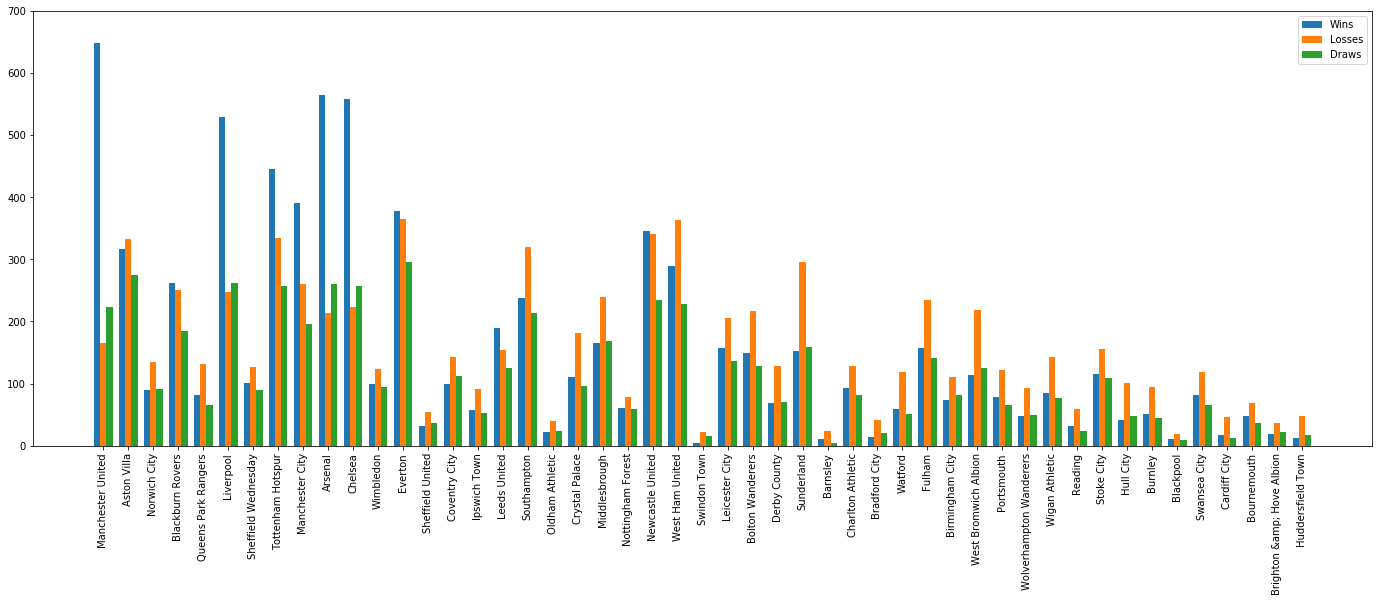

In [10]:
indx=np.arange(0, len(records), 1)
score_label=np.arange(0, 800, 100)
bar_width=0.25
fig, ax = plt.subplots(figsize=(24,8))
bar_win=ax.bar(indx-bar_width, [v['Win'] for (k, v) in records.items()], bar_width, label='Wins')
bar_loss=ax.bar(indx, [v['Loss'] for (k, v) in records.items()], bar_width, label='Losses')
bar_draw=ax.bar(indx+bar_width, [v['Draw'] for (k, v) in records.items()], bar_width, label='Draws')

ax.set_xticks(indx)
ax.set_xticklabels([k for (k, v) in records.items()], rotation=90)

ax.set_yticks(score_label)
ax.set_yticklabels(score_label)

ax.legend()
plt.show()

### Calculating the Win Rate of Various teams and tabulating

In [11]:
df1 = pd.DataFrame([(k, v['Win'], v['Loss'], v['Draw'], v['Win']/(v['Win']+v['Loss']+v['Draw'])) for (k,v) in records.items()])
df1.columns=['Team', 'Wins', 'Losses', 'Draws', 'Win Rate']
df1 

,Team,Wins,Losses,Draws,Win Rate
0,Manchester United,648,166,224,0.624277
1,Aston Villa,316,333,275,0.341991
2,Norwich City,89,135,92,0.281646
3,Blackburn Rovers,262,250,184,0.376437
4,Queens Park Rangers,81,132,65,0.291367
5,Liverpool,529,247,262,0.509634
6,Sheffield Wednesday,101,126,89,0.319620
7,Tottenham Hotspur,446,335,257,0.429672
8,Manchester City,391,261,196,0.461085
9,Arsenal,565,213,260,0.544316


### Plotting the graph for Win Percentage

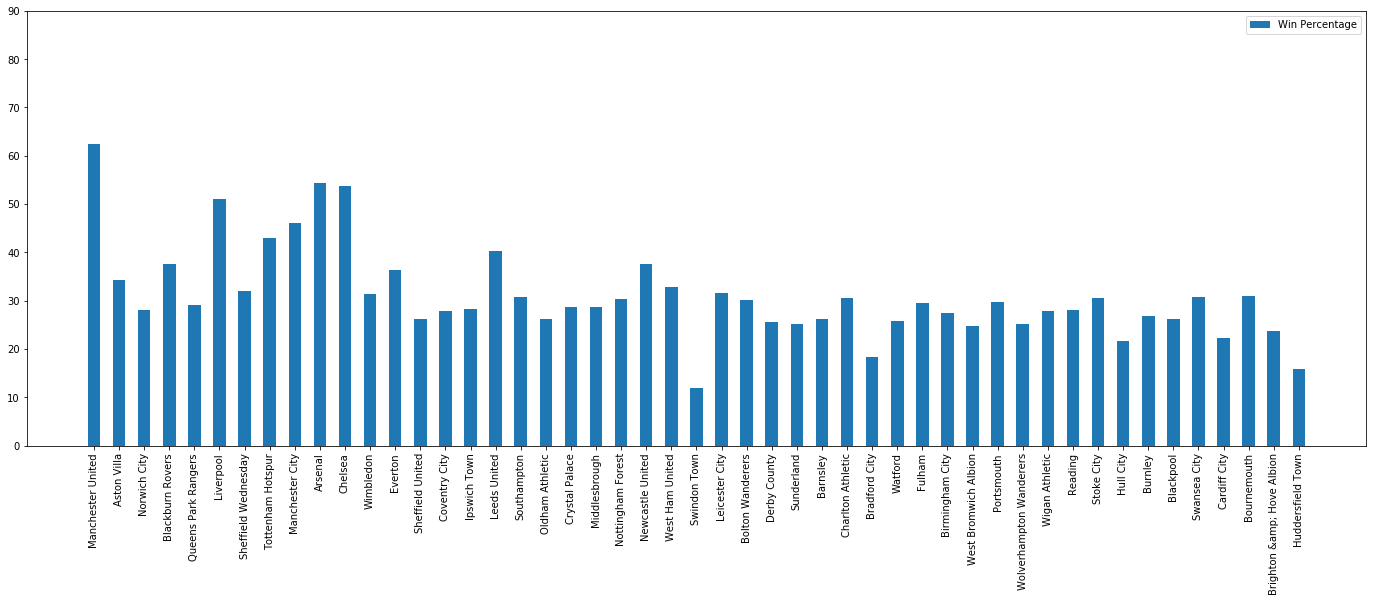

In [12]:
indx=np.arange(0, len(records), 1)
score_label=np.arange(0, 100, 10)
bar_width=0.5
fig, ax = plt.subplots(figsize=(24,8))
bar_winrate=ax.bar(indx, [v['Win']*100/(v['Win']+v['Loss']+v['Draw']) for (k, v) in records.items()], bar_width, label='Win Percentage')

ax.set_xticks(indx)
ax.set_xticklabels([k for (k, v) in records.items()], rotation=90)

ax.set_yticks(score_label)
ax.set_yticklabels(score_label)

ax.legend()
plt.show()

## Result: From the plot it is evident that Manchester United has the highest win rate amongst all the teams followed by Arsenal and Chelsea

### Thank You :)
### Name: Arjun Kathail
### Sid: 19103028